# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}$appid={weather_api_key}'
url

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp_celsius = city_max_temp_kelvin - 273.15 # Convert from Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | colonia
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | mata-utu
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | wanning
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | namsos
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | west odessa
Processing Record 16 of Set 1 | zaozersk
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | potosi
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | bargarh
Processing Record 22 of Set 1 | grytviken
Processing Rec

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [22]:
# Display sample data
import os

output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,4.81,87,100,2.06,AR,1699673526
1,colonia,50.9333,6.9500,7.76,91,75,5.14,DE,1699673442
2,papatowai,-46.5619,169.4708,18.11,47,0,2.20,NZ,1699673407
3,puerto natales,-51.7236,-72.4875,4.35,95,100,2.46,CL,1699673487
4,mata-utu,-13.2816,-176.1745,28.56,77,98,3.95,WF,1699673660


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,87,100,2.06,AR,1699673526
1,colonia,50.9333,6.9500,7.76,91,75,5.14,DE,1699673442
2,papatowai,-46.5619,169.4708,18.11,47,0,2.20,NZ,1699673407
3,puerto natales,-51.7236,-72.4875,4.35,95,100,2.46,CL,1699673487
4,mata-utu,-13.2816,-176.1745,28.56,77,98,3.95,WF,1699673660


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

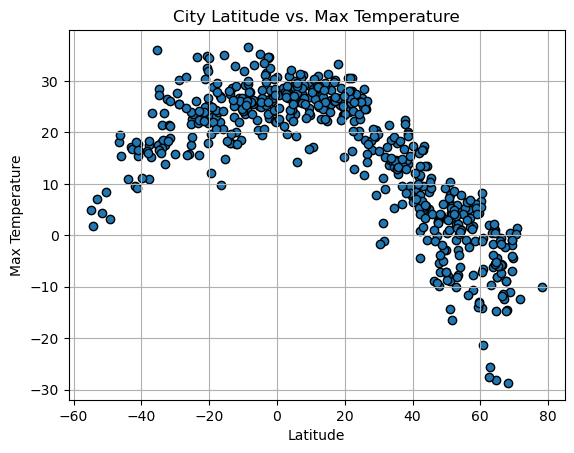

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

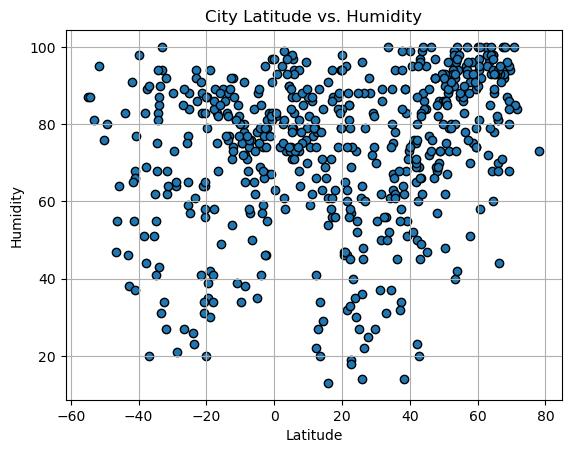

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

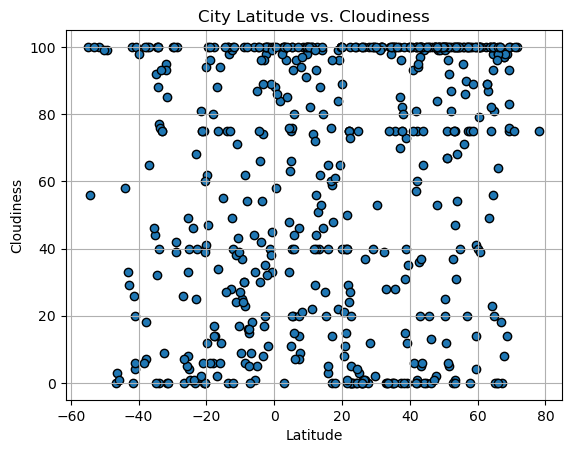

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

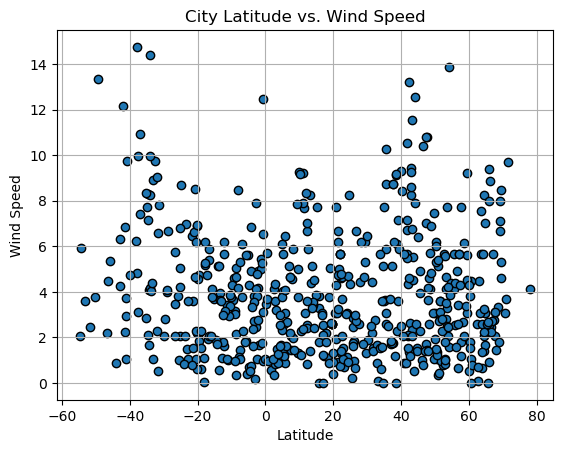

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=15, color="red")
    plt.grid(True)

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,colonia,50.9333,6.9500,7.76,91,75,5.14,DE,1699673442
8,wanning,18.8003,110.3967,28.60,74,22,3.79,CN,1699673661
10,talnakh,69.4865,88.3972,-4.33,94,100,5.30,RU,1699673662
11,namsos,64.4662,11.4957,1.03,60,98,8.23,NO,1699673662
12,enewetak,11.3474,162.3373,28.63,77,74,7.69,MH,1699673663


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,4.81,87,100,2.06,AR,1699673526
2,papatowai,-46.5619,169.4708,18.11,47,0,2.20,NZ,1699673407
3,puerto natales,-51.7236,-72.4875,4.35,95,100,2.46,CL,1699673487
4,mata-utu,-13.2816,-176.1745,28.56,77,98,3.95,WF,1699673660
5,touros,-5.1989,-35.4608,25.19,78,5,5.62,BR,1699673660


###  Temperature vs. Latitude Linear Regression Plot

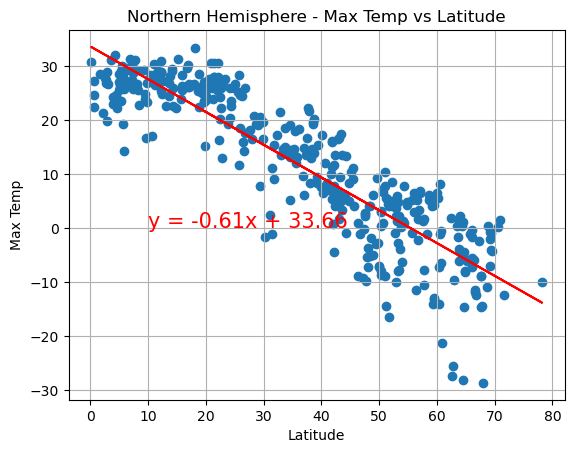

In [32]:
# Linear regression on Northern Hemisphere
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Max Temp vs Latitude", 
                       "Latitude", "Max Temp",
                       (10,0))

plt.show()

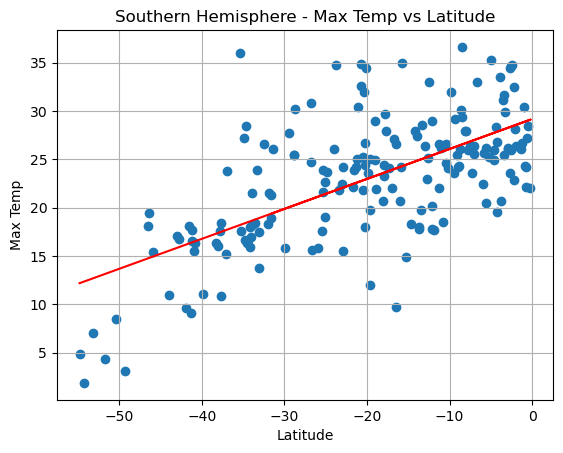

In [33]:
# Linear regression on Southern Hemisphere
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Max Temp vs Latitude", 
                       "Latitude", "Max Temp",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

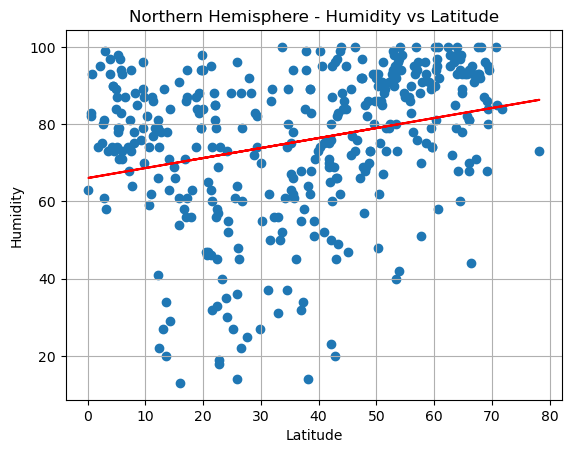

In [34]:

# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Humidity vs Latitude", 
                       "Latitude", "Humidity",
                       (10,0))

plt.show()

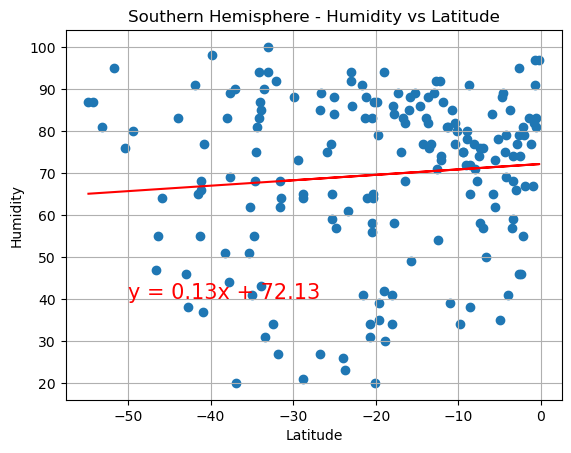

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Humidity vs Latitude", 
                       "Latitude", "Humidity",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

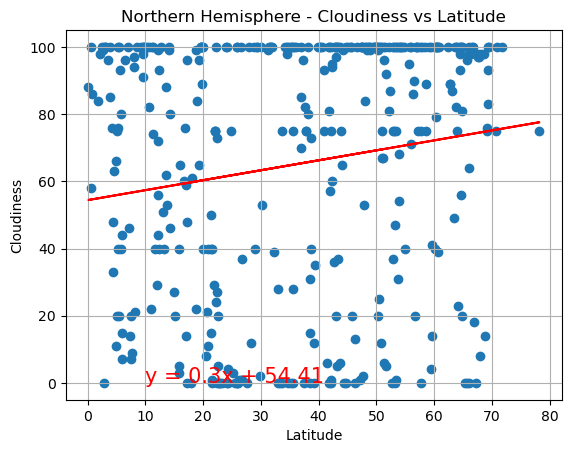

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Cloudiness vs Latitude", 
                       "Latitude", "Cloudiness",
                       (10,0))

plt.show()

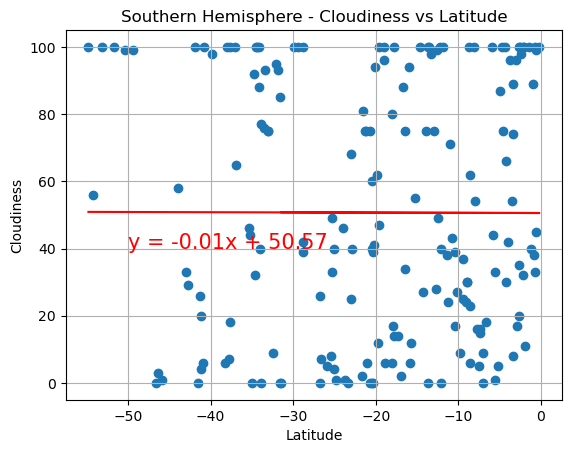

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Cloudiness vs Latitude", 
                       "Latitude", "Cloudiness",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

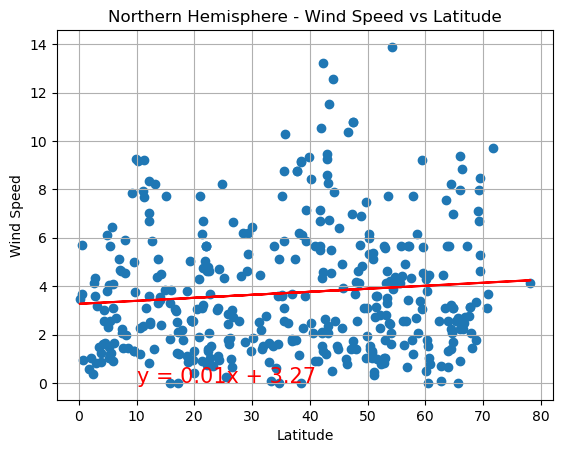

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Wind Speed vs Latitude", 
                       "Latitude", "Wind Speed",
                       (10,0))

plt.show()

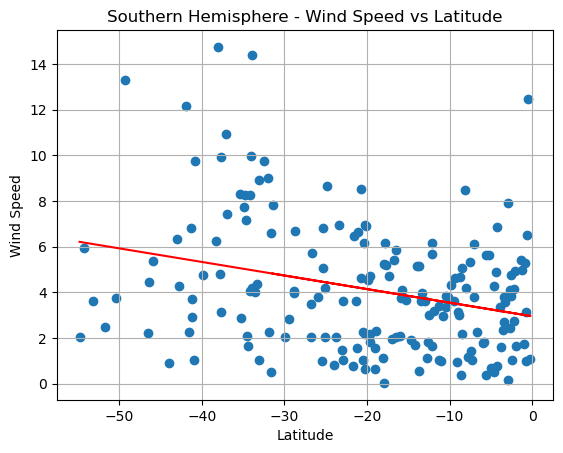

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Wind Speed vs Latitude", 
                       "Latitude", "Wind Speed",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE